In [2]:
from IPython.display import display, Latex
import sympy
from sympy.core.symbol import symbols, Symbol
from sympy.printing import latex, pprint
from sympy import log, exp, oo, integrate, Function, lambdify, nsolve, Pow, S, Derivative
from sympy import simplify, collect, expand, factor, apart, cancel 
from sympy.solvers.solveset import nonlinsolve, solveset
from sympy import solve
from sympy.solvers.ode import dsolve
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter
from scipy.optimize import curve_fit, root_scalar, root
from math import pow

In [3]:
gm = symbols('g_m', real=True, positive=True)
ich = symbols('i_{ch}' ,real=True)
ig = symbols('i_{g}' ,real=True)
igd = symbols('i_{gd}' ,real=True)
Ioss = symbols('I_{oss}' ,real=True)
Qoss = symbols('Q_{oss}' ,real=True)
Qrf = symbols('Q_{rf}' ,real=True)
Io = symbols('I_{O}' ,real=True)
Irr = symbols('I_{rr}' ,real=True)
Vth = symbols('V_{th}',real=True, positive=True)
Vgs = symbols('V_{gs}' ,real=True)
Vmil = symbols('V_{mil}' ,real=True)
Vo = symbols('V_{o}' ,real=True)
VLs = symbols('V_{Ls}' ,real=True)
Rd = symbols('R_d' ,real=True, positive=True)
Ld = symbols('L_d' ,real=True, positive=True)
Rg = symbols('R_g' ,real=True, positive=True)
Vg = symbols('V_g' ,real=True, positive=True)
k1 = symbols('k_1')
k1 = symbols('k_2')
w = symbols('omega')
Cds = symbols('C_{ds}' ,real=True, positive=True)
Cgs = symbols('C_{gs}' ,real=True, positive=True)
Cgd = symbols('C_{gd}' ,real=True, positive=True)
Ls = symbols('L_s' ,real=True, positive=True)
trr = symbols('tau_rr', real=True, positive=True)
trv = symbols('t_{rv}', real=True, positive=True)
tc = symbols('tau_c', real=True, positive=True)
tfi = symbols('t_{fi}', real=True, positive=True)
t = symbols('t', real=True)
T1 = symbols('T_1', real=True, positive=True)
k1, k2, x = symbols('k_1, k_2, x',real=True)


#### The values in this dictionary `subs` are taken from the paper. 

In [47]:
subs = {Rg:2.5+4.6, Vth:4.5, Vg:-5, Cgd:14.5e-12, Cds:130e-12, Cgs: 1080e-12,
    Ls:4e-9, Qoss:86.56e-9, Io:20, Vo:30}

#### Let's copy the equations from the paper into our notebook here

In [48]:
eq2 = gm - Pow(k1*Pow(ich, x)/(ich-k2), 1/x)
eq5 = Ioss*(Cgd/(Cgd+Cds)) - (1/Rg)*(Vg - Vmil - VLs)
eq6 = ich - gm*(Vmil-Vth)
eq7 = VLs - 2*Ls*Ioss**2/Qoss
eq10 = 2*Ls*Ioss**2/(Qoss*Rg) + (2/(gm*Rg) +Cgd/(Cgd+Cds))*Ioss + (1/Rg)*(Vg - Vth - Io/gm)

eq12 = ich - (Io - 2*Ioss)
eq13 = trv - Qoss/Ioss
eq15 = tfi + log((Vth+Vg)/(Vmil+Vg))*(Cgs*Rg+gm*Ls)
eq36 = ich - (k1*Pow((Vmil-Vth), x) + k2)
eq36_2 = ich - (k1*Pow((Vgs-Vth), x) + k2)
myprint2(eq2)
myprint2(eq5)
myprint2(eq6)
myprint2(eq7)
myprint2(eq10)
myprint2(eq15)

myprint2(eq36)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Let's find $x$, $k_1$, $k_2$, and compare to the paper 

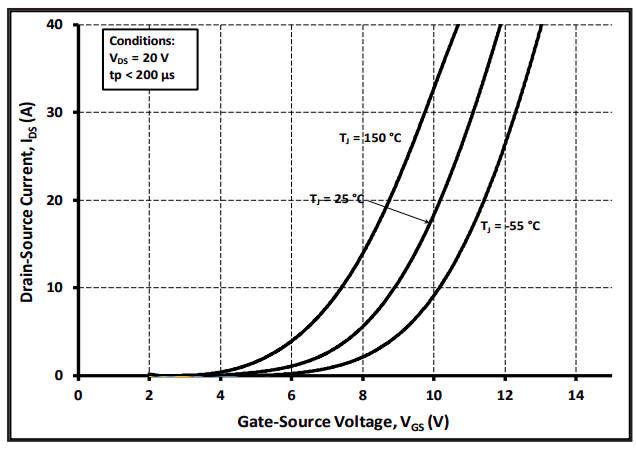

#### I used Enguage Digitizer to get the x,y points from the datasheet curve

In [49]:
Ids_curve = [0.578,0.942,1.187,2.105,3.478,5.194,7.138,9.423,13.693,20.844,23.47,26.21,28.836,29.978,32.718,35.458,38.198]
Vgs_curve = [5.0108,5.5618,6.0081,6.6576,7.2793,7.8448,8.326,8.751,9.4284,10.2559,10.512,10.7683,11.0244,11.11,11.3381,11.5379,11.7659]
def f(Vgs, x, k1, k2, ):
    '''
    this function is used by curve_fit
    '''
    Vth =4.5
    return k1*(Vgs -Vth)**x + k2
[subs[x], subs[k1], subs[k2]] = curve_fit(f, Vgs_curve, Ids_curve)[0]

In [50]:
myVgs = np.linspace(4.51, 12, 50)
myIds = .1319*np.power((myVgs-4.5), 3.8) - .076
f_myIds2 = lambdify(Vgs, -eq36_2.subs(subs)+ich)
myIds2=  f_myIds2(myVgs)

Text(0.2, 0.8, 'Vds = 20V')

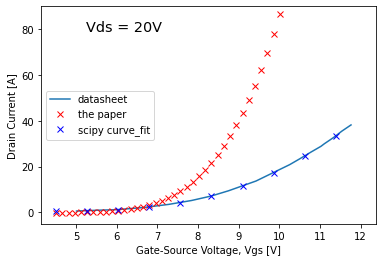

In [51]:
fig, ax = plt.subplots(1,1)
ax.plot(Vgs_curve, Ids_curve, label='datasheet')
ax.plot(myVgs, myIds, linestyle='none', marker= 'x', color='red', label='the paper')
ax.plot(myVgs, myIds2, linestyle='none', marker= 'x', color='blue', label = 'scipy curve_fit', markevery=5)
ax.set_ylabel('Drain Current [A]')
ax.set_ylim(-5, 90)
ax.legend(loc='center left')
ax.set_xlabel('Gate-Source Voltage, Vgs [V]')
ax.annotate('Vds = 20V', xy=(.2, .8), xycoords='figure fraction', fontsize='x-large')

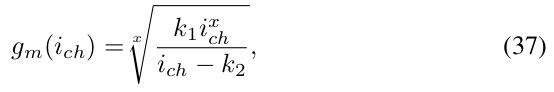

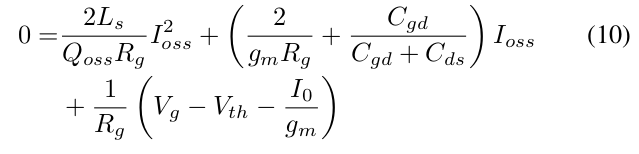

In [52]:
display(eq2.subs(subs))
#display(eq5.subs(subs))
display(eq6.subs(subs))
#display(eq7.subs(subs))
#display(eq10.subs(subs))
display(eq12.subs(subs))
display(eq13.subs(subs))
#display(eq15.subs(subs))
display(eq36.subs(subs))


g_m - 0.527845262007277*(i_{ch}**2.70302266258416/(i_{ch} - 0.614457134902309))**0.369956202677181

-g_m*(V_{mil} - 4.5) + i_{ch}

2*I_{oss} + i_{ch} - 20

t_{rv} - 8.656e-8/I_{oss}

i_{ch} - 10.365192067556*(0.222222222222222*V_{mil} - 1)**2.70302266258416 - 0.614457134902309

x, y, z = symbols('x y z')
eqa = .5*x + 1 - y
eqb = -2*x + 6 - y
eqc = (x-2)*(x-2)*(y-2)-z
nsolve((eqa, eqb, eqc), (x,y,z), (1,1,1))

def f3(arr):
    return np.array([.5*arr[0] + 1 - arr[1],
                       -2*arr[0] + 6 - arr[1],
                     (arr[0]-2)*(arr[0]-2)*(arr[1]-2) - arr[2]])
f3([2,2,0])
    

def f2(arr):
    return np.array([arr[0] - 1 - arr[1],
                       2*arr[0] + 2 - arr[1]])
f2([1,2])
root(f2, [0,0])

root(f3, [0,0,0])


The sympy expression are all implicitly equal to zero. That means values of the unknowns that satisfy the system of equations are the roots. [sympy.solvers.solvers.nsolve](https://docs.sympy.org/latest/modules/solvers/solvers.html) can numerically solve the nonlinear system of equations. 

In [53]:
nsolve((eq2.subs(subs), eq6.subs(subs),
       eq10.subs(subs),eq12.subs(subs),eq13.subs(subs),eq36.subs(subs)),
       (Ioss, gm, Vmil, ich, trv), (8.3, 1, 7.46, 6, 1e-9))#, verify=False)# solver='MDNewton')

Matrix([
[   8.29571047701901],
[   1.23023693619336],
[    7.2706687595553],
[   3.40857904596197],
[1.04343082174566e-8]])

Scipy also has root solver, but [scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)but some more work is necessary to go from our sympy expressions to the format required by that. 

In [11]:
#root((eq2.subs(subs), eq6.subs(subs),
#       eq10.subs(subs),eq12.subs(subs),eq13.subs(subs),eq36.subs(subs)),
#       (Ioss, gm, Vmil, ich, trv), (8.3, 1, 7.46, 6, 1e-9))

### Determine $I_{oss}$, $g_m$, $V_{mil}$ iteratively, using the same method as the paper

In [54]:
#Iossnew = subs[Io]
gm_new = (subs[k1]*(subs[Io])**subs[x]/(subs[Io]-subs[k2]))**(1/subs[x]) #eq37 with ich = Io, instead of ich = Io - 2*Ioss
subs[gm] = gm_new
pct_change=1
while (pct_change > .05):
    gm_old = subs[gm]
    #find roots of eq 10 with existing gm 
    f = lambdify(Ioss, eq10.subs(subs))
    sol = root_scalar(f, bracket=[0, 20])
    Iossnew = sol.root
    subs[gm] = (subs[k1]*(subs[Io]-2*Iossnew)**subs[x]/((subs[Io]-2*Iossnew)-subs[k2]))**(1/subs[x])
    pct_change = abs(subs[gm] - gm_old)/gm_old 
subs[gm] = gm_new
subs[Ioss] = Iossnew

In [55]:
print(f'Iossnew converges to: {Iossnew:.2f}A')
print(f'Ich converges to: {(subs[Io]-2*Iossnew):.2f}A')
print(f'gm converges to: {subs[gm]:.2f} S')
print(f'τ_rv converges to: {subs[Qoss]*1e9/Iossnew:.3f}ns')
subs[Vmil] = (subs[Io]-2*Iossnew)/subs[gm] + subs[Vth]
print(f'V_mil converges to: {subs[Vmil]:.3f}V')
#g = lambdify(tfi, eq15
#print(f't_fi converges to: {g():.3f}')

Iossnew converges to: 8.27A
Ich converges to: 3.47A
gm converges to: 3.53 S
τ_rv converges to: 10.471ns
V_mil converges to: 5.483V


In [ ]:
subs = {Rg:2.5+4.6, Vth:4.5, Vg:-5, Cgd:14.5e-12, Cds:130e-12, Cgs: 1080e-12,
    Ls:4e-9, Qoss:86.56e-9, Io:20 }

In [ ]:
fig,ax = plt.subplots(1,1)
subs = {Rg:2.5+4.6, Vth:4.5, Vg:-5, Cgd:14.5e-12, Cds:130e-12,
    Ls:4e-9, Qoss:86.56e-9, Io:20, gm:3.5 }
f = lambdify(Ioss, eq10.subs(subs))
i = np.linspace(-10,20, 300)
ax.plot(i, f(i) )

#### These substitutions ($I_o = 2*I_{oss}, Q_{oss}=(C_{gd}+C_{ds})*V_o$ ) yield equation 14, but `solveset` has the terms arranged differently. Recall the paper calls the input voltage $V_o$.

In [81]:
solveset(eq10.subs({Io:2*Ioss, Qoss: 2*(Cgd+Cds)*Vo}), Ioss, domain=S.Reals)

Intersection(FiniteSet((-C_{gd}*R_g*V_{o} + sqrt(-4*C_{ds}*L_s*V_g*V_{o} + 4*C_{ds}*L_s*V_{o}*V_{th} + C_{gd}**2*R_g**2*V_{o}**2 - 4*C_{gd}*L_s*V_g*V_{o} + 4*C_{gd}*L_s*V_{o}*V_{th}))/(2*L_s), (-C_{gd}*R_g*V_{o} - sqrt(-4*C_{ds}*L_s*V_g*V_{o} + 4*C_{ds}*L_s*V_{o}*V_{th} + C_{gd}**2*R_g**2*V_{o}**2 - 4*C_{gd}*L_s*V_g*V_{o} + 4*C_{gd}*L_s*V_{o}*V_{th}))/(2*L_s)), Reals)

In [85]:
a = 2*Ls/(Rg*Vo*(2*Cds+2*Cgd))
a

2*L_s/(R_g*V_{o}*(2*C_{ds} + 2*C_{gd}))

In [ ]:
b = Cgs/(Cgd+Cds) + 2/(Rg*gm) -2/(Rg*gm)

In [95]:
eq10_ = collect(eq10.subs({Io:2*Ioss, Qoss: 2*(Cgd+Cds)*Vo}), Ioss)
display(eq10_.coeff(Ioss**2))
display(eq10_.coeff(Ioss))

2*L_s/(R_g*V_{o}*(2*C_{ds} + 2*C_{gd}))

C_{gd}/(C_{ds} + C_{gd}) + 2/(R_g*g_m)

In [93]:
eq10_

2*I_{oss}**2*L_s/(R_g*V_{o}*(2*C_{ds} + 2*C_{gd})) + I_{oss}*(C_{gd}/(C_{ds} + C_{gd}) + 2/(R_g*g_m)) + (-2*I_{oss}/g_m + V_g - V_{th})/R_g

In [83]:
ans = solveset(eq10.subs({Io:2*Ioss, Qoss: 2*(Cgd+Cds)*Vo}), Ioss, domain=S.Reals).args[1].args[0]

In [84]:

lhs = 'I_{o,zvs}'
result = "$${} = {} $$".format(lhs,latex(ans))
display(Latex(result))

<IPython.core.display.Latex object>

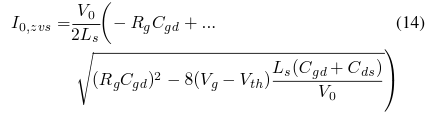

In [78]:
eq14 = Vo*(-Rg*Cgd + ((Rg*Cgd)**2 - 8*(Vg-Vth)*Ls*(Cgd+Cds)/Vo)**.5)/(2*Ls)
display(eq14)
eq14.subs(subs)

V_{o}*(-C_{gd}*R_g + (C_{gd}**2*R_g**2 - L_s*(C_{ds} + C_{gd})*(8*V_g - 8*V_{th})/V_{o})**0.5)/(2*L_s)

4.16808882092756

In [79]:

ans.subs(subs).evalf(4)

2.084

#### Interval 2a

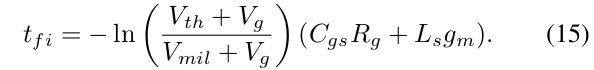

$$-V_g + i_gR_g + V_{gs}(t) + L_s\frac{d(g_m(V_{gs}(t)-V_{th}))}{dt}$$
$$-V_g + R_gC_{gs}\frac{dV_{gs}(t)}{dt} + V_{gs}(t) + L_s\frac{d(g_m(V_{gs}(t)-V_{th}))}{dt}=0$$
$$-V_g + R_gC_{gs}\frac{dV_{gs}(t)}{dt} + V_{gs}(t) + g_mL_s\frac{dV_{gs}(t)}{dt}=0$$
$$(R_gC_{gs}+g_mL_s)\frac{dV_{gs}(t)}{dt} + V_{gs}(t)=V_g$$
$$\frac{dV_{gs}(t)}{dt} + \frac{V_{gs}(t)}{R_gC_{gs}+g_mL_s}=\frac{V_g}{R_gC_{gs}+g_mL_s}$$
$$\frac{d}{dt}\Large \left(\normalsize e^{t/(R_gC_{gs}+g_mL_s)}V_{gs}(t)\Large \right)\normalsize =\frac{V_ge^{t/(R_gC_{gs}+g_mL_s)}}{R_gC_{gs}+g_mL_s}$$
$$ e^{t/(R_gC_{gs}+g_mL_s)}V_{gs}(t) =\int_{}^{}\frac{V_ge^{t/(R_gC_{gs}+g_mL_s)}}{R_gC_{gs}+g_mL_s}dt$$
$$ e^{t/(R_gC_{gs}+g_mL_s)}V_{gs}(t) =\frac{V_g}{R_gC_{gs}+g_mL_s}\int_{}^{}e^{t/(R_gC_{gs}+g_mL_s)}dt$$
$$e^{t/(R_gC_{gs}+g_mL_s)}V_{gs}(t) =V_ge^{t/(R_gC_{gs}+g_mL_s)}+C$$
$$ V_{gs}(t) =V_g+Ce^{-t/(R_gC_{gs}+g_mL_s)}$$
$$C =  V_{gs}(0) - V_g =V_{mil} - V_g$$
$$V_{gs}(t) =V_g+(V_{mil}-{V_g})e^{-t/(R_gC_{gs}+g_mL_s)}$$
$$V_{gs}(t_{fi}) =V_{th} = V_g+(V_{mil}-{V_g})e^{-t_{fi}/(R_gC_{gs}+g_mL_s)}$$
$$\frac{V_{th} - V_g}{V_{mil}-{V_g}}=e^{-t_{fi}/(R_gC_{gs}+g_mL_s)}$$
$$t_{fi}=-\ln\frac{V_{th} - V_g}{V_{mil}-{V_g}}(R_gC_{gs}+g_mL_s)$$

In [37]:

from sympy.abc import t # x is the independent variable
C1 = symbols('C1')
f = Function("Vgs")(t) # f is a function of x
# f_ will be the derivative of f with respect to x
f_ = Derivative(f, t)
diffeq = f_ + (1/(Rg*Cgs + gm*Ls))*f - Vg/(Rg*Cgs+gm*Ls)
diffeq

-V_g/(C_{gs}*R_g + L_s*g_m) + Derivative(Vgs(t), t) + Vgs(t)/(C_{gs}*R_g + L_s*g_m)

In [38]:
dsolve(diffeq, func=f)

Eq(-log(-V_g + Vgs(t)), C1 + t/(C_{gs}*R_g + L_s*g_m))

In [39]:
sol = simplify(dsolve(diffeq).rhs)#, ics={f(0):Vmil, f(tfi):Vth})
sol

C1 + t/(C_{gs}*R_g + L_s*g_m)

In [40]:
sol.args[0] == C1

True

In [41]:
constants.keys()

dict_keys([C1])

In [42]:
#sol = dsolve(f(x).diff(x,2)+f(x),f(x)).rhs
#constants = solve([sol.subs({Vgs:Vmil, t:0})])
constants = solve([sol.subs({Vgs:Vmil, t:0})])
final_answer = sol.subs({C1:constants[C1]})
final_answer

t/(C_{gs}*R_g + L_s*g_m)

In [43]:
final_answer.subs({t:tfi})

t_{fi}/(C_{gs}*R_g + L_s*g_m)

In [ ]:
from scipy.optimize import NonlinearConstraint
con = lambda x: x[0] - np.sin(x[1])
nlc = NonlinearConstraint(con, -np.inf, 1.9)
nlc

### Body Diode Reverse Recovery Parameters - TurnOn, Interval 2B
#### The numbers the paper says are from the datasheet don't exactly match again. 

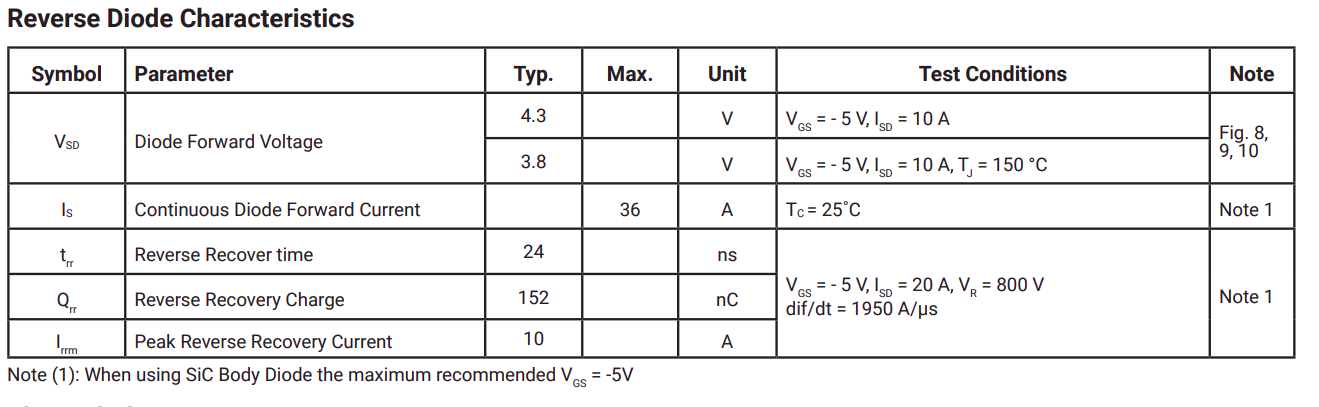

In [ ]:
Coss_800V = 92e-12 #farads
Vds_test = 800 #volts
Qrr = 152e-9 # coulombs
Qrr_ = Qrr - Coss_800V*Vds_test 
print(f'Corrected Reverse Recovery Charge Qrr_ = {Qrr_:.3e} coulombs')

In [ ]:
def fIrrt(t):
    return -Irr*exp(-(t-T1)/trr)
fIrrt    

In [ ]:
fIrrt = Function(Irr)(t)
-Irrpk*exp(-(t-T1)/trr)
myprint(fIrrt, Irrt)
myprint(integrate(Irrt, (t, T1, oo)))

the characteristic diode current waveform
(see Fig. 5 a)) can be calculated based on three characteristic
values of the diode: the drift region transit time $T_m$ , the
effective carrier life time $τ_c$ and the time constant $τ_{rr}$ during
the recovery phase $t_{rf}$.

$τ _{rr}$ is found above as $Q_{rf}/I_{rr}$

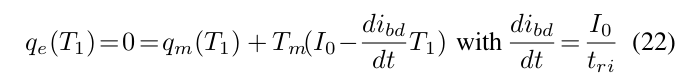

Find the effective carrier lifetime $\tau_c$ by numerically solving equation 40. 
But that requries $T_1$, which is supposed be found with equation 22. There, $q_m(T_1)$ is required, and that depends on $\tau_c$.

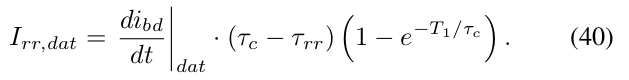

Equation 22 also requires $t_{ri}$:

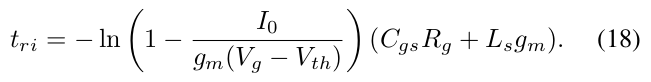

In equation 18, $g_m$ has been already fit to: 

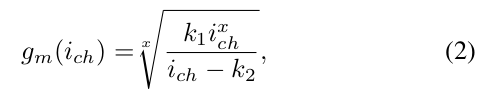

In [ ]:
Irrm = 10 
dibddt = 1950 
tr = Qrr_ / Irrm 

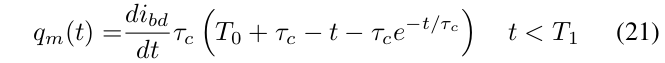

In [1]:
def myprint(*args):
    '''  
    the first argument is the only "lhs"
    subsequent arguments are rhs-s
    '''
    
    def helper(args):
        if len(args) == 0:
            return ''
        else: 
            return f'= {latex(args[0])}' + helper(args[1:])
        
    s = f'$${latex(args[0])} {helper(args[1:])}$$' 
    display(Latex(s))   
    
def myprint2(eq):
    #if isinstance(eq2.func, sympy.core.add.Add):
    if eq.func == sympy.core.add.Add:
        lhs = eq.args[0]
        rhs = eq - lhs
        myprint(-1*lhs, rhs)
    elif any([isinstance(eq, rel) for rel in (sympy.core.relational.LessThan,
            sympy.core.relational.GreaterThan,
            sympy.core.relational.StrictGreaterThan,
            sympy.core.relational.StrictLessThan)]):
        display(eq)
    else:
        print(type(eq))
        #print('didnt work')
        
    return